# Identifier mapping
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/py4cytoscape/blob/0.0.10/doc/tutorials/Identifier-mapping.ipynb)

**by Kozo Nishda, Alexander Pico, Barry Demchak**

**py4cytoscape 0.0.10**

This notebook will show you how to map or translate identifiers from one database (e.g., Ensembl) to another (e.g, Entrez Gene). This is a common requirement for data analysis. In the context of Cytoscape, for example, identifier mapping is needed when you want to import data to overlay on a network but you don’t have matching keys. There are three distinct examples below, highlighting different lessons that may apply to your use cases.

## Prerequisites
In addition to this package (py4cytoscape), you will need:

- Cytoscape 3.8 or greater, which can be downloaded from https://cytoscape.org/download.html. Simply follow the installation instructions on screen.
- Complete installation wizard
- Launch Cytoscape
- If your Cytoscape is 3.8.2 or earlier, install FileTransfer App (Follow [here](https://py4cytoscape.readthedocs.io/en/0.0.10/tutorials/index.html) to do it.)

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

### Setup required only in a remote notebook environment
If you're using a remote Jupyter Notebook environment such as Google Colab, run the cell below.
(If you're running a local Jupyter Notebook server on the desktop machine same with Cytoscape, you don't need to do that.)

In [1]:
_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@0.0.10'
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Note that to use the current py4cytoscape release (instead of v0.0.10), remove the _PY4CYTOSCAPE= line in the snippet above.


### Sanity test to verify Cytoscape connection
By now, the connection to Cytoscape should be up and available. To verify this, try a simple operation that doesn't alter the state of Cytoscape.

In [52]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.10'}

## Example: Species specific considerations

When planning to import data, you need to consider the key columns you have in your network data and in your table data. It’s always recommended that you use proper identifiers as your keys (e.g., from databases like Ensembl and Uniprot-TrEMBL). Relying on conventional symbols and names is not standard and error prone.

Let’s start with the sample network provided by Cytoscape.

**Caution: Loading a session file will discard your current session. Save first, if you have networks or data you want to keep. Use p4c.save_session(‘path_to_file’).**

In [53]:
p4c.open_session() #Closes current session (without saving) and opens a sample session file

Opening sampleData/sessions/Yeast Perturbation.cys...


{}

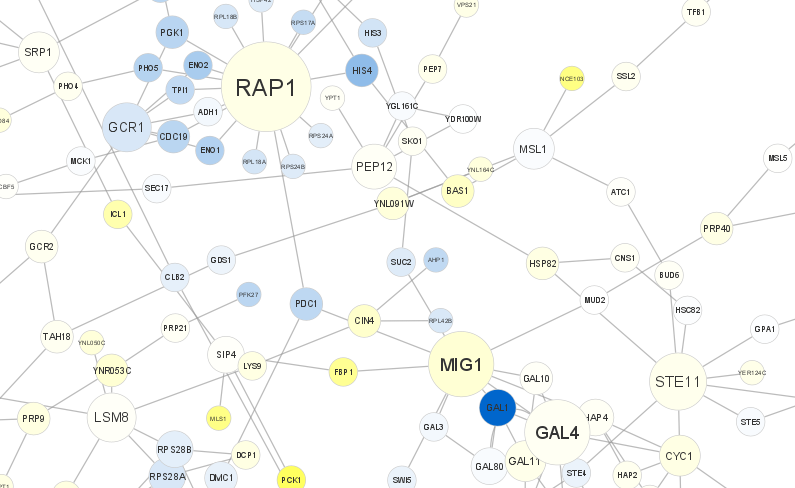

In [54]:
p4c.notebook_export_show_image()

You should now see a network with just over 300 nodes. If you look at the Node Table, you’ll see that there are proper identifiers in the name columns, like “YDL194W”. These are the Ensembl-supported IDs for Yeast.

### Perform identifier mapping
You need to know a few things about your network in order to run this function, e.g., the species and starting (or source) identifier type. This isn’t usually a problem, but **this example highlights a unique case where the Ensembl ID type for a particular species (i.e., Yeast) has a particular format (e.g., YDL194W)**, rather than the more typical ENSXXXG00001232 format.

So, with this knowledge, you can run the following function:

In [55]:
mapped_cols = p4c.map_table_column(column='name', species='Yeast', map_from='Ensembl', map_to='Entrez Gene')

We are asking Cytoscape to look in the name column for *Yeast Ensembl* IDs and then provide a new columns of corresponding *Entrez Gene* IDs. And if you look back at the Node Table, you’ll see that new column (all the way to the right). That’s it!

The return value is a data frame of all the mappings between Ensembl and Entrez Gene that were found for your network in case you want those details:

In [56]:
mapped_cols

,name,Entrez Gene
61,YDL194W,851333
62,YDR277C,851870
63,YBR043C,852331
64,YPR145W,856268
65,YER054C,856781
...,...,...
386,YOR204W,854379
387,YGL097W,852782
388,YGR218W,853133
389,YGL122C,852755


*Note: the row names of the return data frame are the node SUIDs from Cytoscape. These are handy if you want to load the mappings yourself (see last example).*

## Example: From proteins to genes
For this next example, you’ll need the STRING app to access the STRING database from within Cytoscape: * Install the STRING app from https://apps.cytoscape.org/apps/stringapp

In [57]:
p4c.install_app('STRINGapp')

{}


{}

Now we can import protein interaction networks with a ton of annotations from the STRING database with a simple commandsGET function, like this:

In [58]:
string_cmd = 'string disease query disease="breast cancer" cutoff=0.9 species="Homo sapiens" limit=150'
p4c.commands_get(string_cmd)

["Loaded network 'String Network - breast cancer' with 150 nodes and 877 edges"]

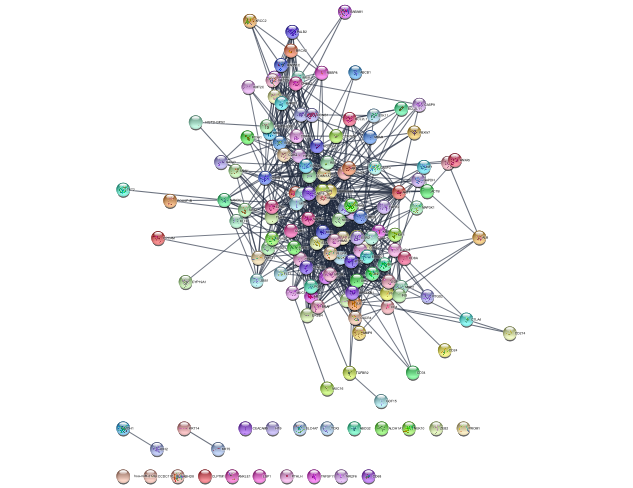

In [59]:
p4c.notebook_export_show_image()

for more information on string commands:

In [60]:
p4c.commands_help('string')

['add nodes',
 'change confidence',
 'compound query',
 'disease query',
 'expand',
 'filter enrichment',
 'hide charts',
 'hide glass',
 'hide images',
 'hide labels',
 'list species',
 'make string',
 'protein query',
 'pubmed query',
 'retrieve enrichment',
 'retrieve publications',
 'settings',
 'show charts',
 'show enrichment',
 'show images',
 'show publications',
 'stringify',
 'version']

In [61]:
p4c.commands_help('string disease query')

['cutoff', 'disease', 'limit', 'species', 'taxonID']

Check out the Node Table and you’ll see display names and identifiers. In particular, the *canonical name* column appears to hold Uniprot-TrEMBL IDs. Nice, we can use that!

### Perform identifier mapping
Say we have a dataset keyed by Ensembl gene identifiers. Well, then we would want to perform this mapping:

In [62]:
mapped_cols = p4c.map_table_column(column='stringdb::canonical name', species='Human', map_from='Uniprot-TrEMBL', map_to='Ensembl')

In [63]:
mapped_cols

,stringdb::canonical name,Ensembl
1536,O43502,ENSG00000108384
1537,P48735,ENSG00000182054
1538,P24385,ENSG00000110092
1539,P08069,ENSG00000140443
1540,P21860,ENSG00000065361
...,...,...
1531,P14635,ENSG00000134057
1532,P46531,ENSG00000148400
1533,P35354,ENSG00000073756
1534,P35968,ENSG00000128052


Scroll all the way to the right in the Node Table and you’ll see a new column with Ensembl IDs. **This example highlights a useful translation from protein to gene identifiers (or vice versa), but is also a caution to be aware of the assumptions involved when making this translation.** For example, a typical gene encodes for many proteins, so you may have many-to-one mappings in your results.

## Example: Mixed identifiers
From time to time, you’ll come across a case where the identifiers in your network are of mixed types. This is a rare scenario, but here is one approach to solving it.

First, you’ll need the WikiPathways app to access the WikiPathways database. The pathways in WikiPathways are curated by a community of interested researchers and citizen scientists. As such, there are times where authors might use different sources of identifiers. They are valid IDs, just not all from the same source. Future versions of the WikiPathways app will provide pre-mapped columns to a single ID type. But in the meantime (and relevant to other use cases), **this example highlights how to handle a source of mixed identifier types.**

- Install the WikiPathways app from https://apps.cytoscape.org/apps/wikipathways

In [64]:
p4c.install_app('WikiPathways')

{}


{}

Now we can import an Apoptosis Pathway from WikiPathways. Either from the web site (https://wikipathways.org), or from the Network Search Tool in Cytoscape GUI or from the rWikiPathways package, we could identify the pathway as WP254.

In [65]:
wp_cmd = 'wikipathways import-as-pathway id="WP254"'
p4c.commands_get(wp_cmd)

[]

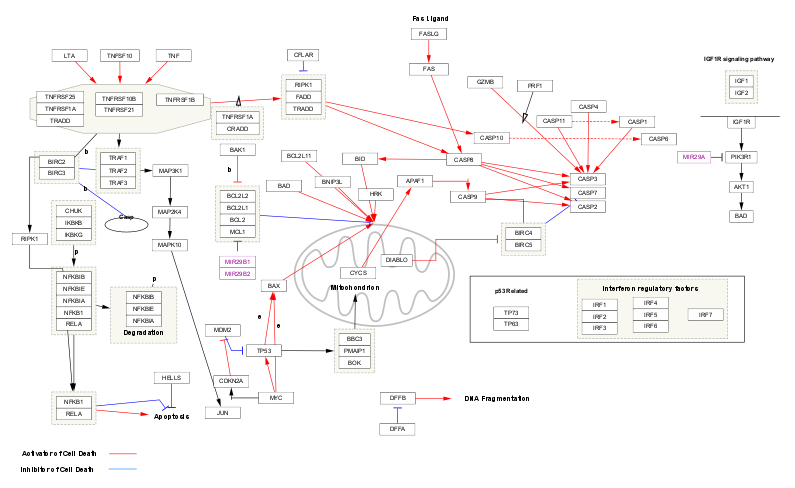

In [66]:
p4c.notebook_export_show_image()

for more information on wikipathways commands:

In [67]:
p4c.commands_help('wikipathways')

['import-as-network', 'import-as-pathway']

In [68]:
p4c.commands_help('wikipathways import-as-pathway')

['id']

Take look in the XrefId column and you’ll see a mix of identifier types. The next column over, XrefDatasource, conveniently names each type’s source. Ignoring the metabolites for this example, we just have a mix of Ensembl and Entrez Gene to deal with.

### Perform identifier mapping
Say we want a column with only Ensembl IDs. The easiest approach is to simply overwrite all the non-Ensembl IDs, i.e., in this case, Entrez Gene IDs. Let’s collect the mappings first:

In [69]:
mapped_cols = p4c.map_table_column(column='XrefId', species='Human', map_from='Entrez Gene', map_to='Ensembl')

Next, we want to remove the values from the Ensembl column in our resulting mapped.cols data frame. We’ll also remove the original source columns (to avoid confusion) and rename our Ensembl column to XrefId to prepare to overwrite. Then we’ll load that into Cytosacpe:

In [70]:
mapped_cols

,XrefId,Ensembl
3584,3660,ENSG00000168310
3585,4793,ENSG00000104825
3586,4049,ENSG00000226979
3587,837,ENSG00000196954
3588,3664,ENSG00000117595
...,...,...
3579,27242,ENSG00000146072
3580,572,ENSG00000002330
3581,4792,ENSG00000100906
3582,834,ENSG00000137752


In [71]:
only_mapped_cols = mapped_cols.dropna(axis=0, how='any')['Ensembl'].to_frame()

In [72]:
only_mapped_cols

,Ensembl
3584,ENSG00000168310
3585,ENSG00000104825
3586,ENSG00000226979
3587,ENSG00000196954
3588,ENSG00000117595
...,...
3579,ENSG00000146072
3580,ENSG00000002330
3581,ENSG00000100906
3582,ENSG00000137752


In [73]:
only_mapped_cols.columns = ['XrefId']

In [74]:
only_mapped_cols

,XrefId
3584,ENSG00000168310
3585,ENSG00000104825
3586,ENSG00000226979
3587,ENSG00000196954
3588,ENSG00000117595
...,...
3579,ENSG00000146072
3580,ENSG00000002330
3581,ENSG00000100906
3582,ENSG00000137752


In [75]:
p4c.load_table_data(only_mapped_cols, table_key_column='SUID')

'Success: Data loaded in defaultnode table'

In [76]:
df = p4c.get_table_columns()

In [77]:
df[df['XrefId'].notna()]

,SUID,shared name,name,selected,GraphID,XrefId,XrefDatasource,Type,IsGPMLShape,Width,...,Color,LabelFont,LabelSize,Transparent,BorderThickness,BorderStyle,Shape,Ensembl,Ensembl (1),row.names
3584,3584,IRF2,IRF2,False,af7,ENSG00000168310,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000168310,ENSG00000168310,3584
3585,3585,NFKBIB,NFKBIB,False,d93,ENSG00000104825,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000104825,ENSG00000104825,3585
3586,3586,LTA,LTA,False,b09,ENSG00000226979,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000226979,ENSG00000226979,3586
3587,3587,CASP4,CASP4,False,cc5,ENSG00000196954,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000196954,ENSG00000196954,3587
3588,3588,IRF6,IRF6,False,ecc,ENSG00000117595,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000117595,ENSG00000117595,3588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,3579,TNFRSF21,TNFRSF21,False,a75,ENSG00000146072,Entrez Gene,GeneProduct,None,80.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000146072,ENSG00000146072,3579
3580,3580,BAD,BAD,False,bd8,ENSG00000002330,Entrez Gene,GeneProduct,None,40.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000002330,ENSG00000002330,3580
3581,3581,NFKBIA,NFKBIA,False,f31,ENSG00000100906,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000100906,ENSG00000100906,3581
3582,3582,CASP1,CASP1,False,cbb,ENSG00000137752,Entrez Gene,GeneProduct,None,60.0,...,#000000,Arial,10.0,false,1.0,None,Rectangle,ENSG00000137752,ENSG00000137752,3582


Done! See the updated XrefId column in Cytoscape with all Ensembl IDs.

Note: you’ll want to either update the XrefDatasource* column as well or simply make a note to ignore it at this point.*

## More advanced cases
This identifier mapping function is intended to handle the majority of common ID mapping problems. It has limitation, however.

In [78]:
?p4c.map_table_column

Signature:
p4c.map_table_column(
    column,
    species,
    map_from,
    map_to,
    force_single=True,
    table='node',
    namespace='default',
    network=None,
    base_url='http://127.0.0.1:1234/v1',
)
Docstring:
Map Table Column.

Perform identifier mapping using an existing column of supported identifiers to populate a new column with
identifiers mapped to the originals.

Supported species: Human, Mouse, Rat, Frog, Zebrafish, Fruit fly, Mosquito, Worm, Arabidopsis thaliana, Yeast,
E. coli, Tuberculosis. Supported identifier types (depending on species): Ensembl, Entrez Gene, Uniprot-TrEMBL,
miRBase, UniGene,  HGNC (symbols), MGI, RGD, SGD, ZFIN, FlyBase, WormBase, TAIR.

Args:
    column (str): Name of column containing identifiers of type specified by ``map.from``
    species (str): Common name for species associated with identifiers, e.g., Human. See details.
    map_from (str): Type of identifier found in specified ``column``. See details.
    map.to (str): Type of identi

If you need an ID mapping solution for species or ID types not covered by this tool, or if you want to connect to alternative sources of mappings, then check out the BridgeDb app: http://apps.cytoscape.org/apps/bridgedb.

In [79]:
p4c.install_app('BridgeDb')

{}


{}

And then browse the available function with p4c.commands_help(‘bridgedb’)

In [80]:
p4c.commands_help('bridgedb')

['get id types',
 'id mapping',
 'main dialog',
 'resource add',
 'resource config dialog',
 'resource list',
 'resource remove',
 'resource select']